In [1]:
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import folium

%matplotlib inline
ox.__version__

useful_tags_path = ['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name',
                    'highway', 'maxspeed', 'service', 'access', 'area',
                    'landuse', 'width', 'est_width', 'junction', 'traffic_signals']
ox.utils.config(useful_tags_path)

# define the colors to use for different edge types
hwy_colors = {
        'motorway': 'purple',
        'trunk': 'pink',
        'primary': 'green',
        'secondary': 'yellow',
        'tertiary': 'orange',
        'unclassified': 'blue',
        'residential': 'red',
        # 'cycleway': 'skyblue',
        # 'service': 'sienna',
        # 'living street': 'lightgreen',
        # 'pedestrian': 'lightskyblue',
    }

# return edge IDs that do not match passed list of hwys
def find_edges(G, hwys):
    edges = []
    for u, v, k, data in G.edges(keys=True, data='highway'):
        check1 = isinstance(data, str) and data not in hwys
        check2 = isinstance(data, list) and all([d not in hwys for d in data])
        if check1 or check2:
            edges.append((u, v, k))
    return set(edges)


In [64]:
# you can get networks anywhere in the world
#address = "Mayfair, London, England, UK"
#address = 'Doha, Qatar'
address = 'Manhattan, new york'
#address = 'Los Angeles, California'
G = ox.graph_from_address(address, network_type="drive", dist=2000)
#G = ox.graph_from_address(address, network_type="drive")

#G = ox.graph_from_place("Qatar", network_type="drive")



/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [65]:
#Geo.loc[Geo.highway == 'traffic_signals']


In [66]:
G2 = ox.add_edge_speeds(G)
G2 = ox.add_edge_travel_times(G2)
#G2 = ox.add_node_elevations() Needs google API

#list(G2.edges())
#list(G2.edges(data=True)) To get edges data

nodes, edges = ox.graph_to_gdfs(G2) #retursn a geodataFrame (nodes and edges data (just like a pandas dataframe))



In [67]:
print(len(edges))
print(len(edges['name'].value_counts()))

1295
137


In [68]:
#nodes.loc[nodes.index == 21651906]
nodes
#nodes.loc[nodes.highway == 'traffic_signals']
edges


#GeoGraph = ox.graph_from_gdfs(Geo, edges)
ox.plot_graph_folium(G2)

nodes

y          x          highway  street_count  ref  \
osmid                                                                  
42421728    40.798048 -73.960044  traffic_signals             3  NaN   
42421731    40.798654 -73.961474  traffic_signals             4  NaN   
42421737    40.799244 -73.962873  traffic_signals             4  NaN   
42421741    40.800429 -73.965691  traffic_signals             4  NaN   
42421769    40.782638 -73.975007  traffic_signals             3  NaN   
...               ...        ...              ...           ...  ...   
9178805724  40.793888 -73.950145              NaN             2  NaN   
9490559521  40.800970 -73.931776              NaN             3  NaN   
9492618964  40.800620 -73.969293              NaN             2  NaN   
9496980733  40.799387 -73.970192              NaN             2  NaN   
9496980743  40.799761 -73.969921         crossing             2  NaN   

                              geometry  
osmid                                   
42421728    POINT (-73.96004 40.79805)  
42421731    POINT (-73.96147 40.79865)  
42421737    POINT (-73.96287 40.79924)  
42421741    POINT (-73.96569 40.80043)  
42421769    POINT (-73.97501 40.78264)  
...                                ...  
9178805724  POINT (-73.95015 40.79389)  
9490559521  POINT (-73.93178 40.80097)  
9492618964  POINT (-73.96929 40.80062)  
9496980733  POINT (-73.97019 40.79939)  
9496980743  POINT (-73.96992 40.79976)  

[742 rows x 6 columns]

In [69]:
#print(len(nodes), len(Geo))

len(nodes.loc[nodes.highway == 'traffic_signals'])

# print(nodes['highway'].value_counts())

# print(Geo['highway'].value_counts())

# Geo
#Geo
list(edges.iloc[0].geometry.coords)
#edges.iloc[0]

[(-73.9600437, 40.7980478),
 (-73.9599624, 40.798159),
 (-73.9595472, 40.7987264)]

In [70]:
#pd.merge(nodes, Geo, on=['geometry'], how='inner')

In [71]:
edges

osmid               name  \
u          v        key                                                       
42421728   42432736 0                          195743153  Central Park West   
           42421731 0    [420625565, 420625573, 5668966]  West 106th Street   
42421731   42432737 0                          195743186   Manhattan Avenue   
           42421737 0             [195743201, 420625570]  West 106th Street   
42421737   42437917 0                          420625563    Columbus Avenue   
...                                                  ...                ...   
9492618964 42431116 0                         1029634743    West End Avenue   
9496980733 42431113 0                         1030243874    West End Avenue   
           42431111 0                         1030243875    West End Avenue   
9496980743 42431116 0                         1029634744    West End Avenue   
           42431113 0                         1030243876    West End Avenue   

                             highway maxspeed   length  \
u          v        key                                  
42421728   42432736 0      secondary   25 mph   86.258   
           42421731 0      secondary      NaN  138.033   
42421731   42432737 0    residential      NaN   85.611   
           42421737 0      secondary      NaN  134.771   
42421737   42437917 0        primary   25 mph   85.991   
...                              ...      ...      ...   
9492618964 42431116 0      secondary      NaN   36.762   
9496980733 42431113 0      secondary      NaN   39.791   
           42431111 0      secondary      NaN   39.443   
9496980743 42431116 0      secondary      NaN   72.462   
           42431113 0      secondary      NaN    7.623   

                                                                  geometry  \
u          v        key                                                      
42421728   42432736 0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
           42421731 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
42421731   42432737 0    LINESTRING (-73.96147 40.79865, -73.96098 40.7...   
           42421737 0    LINESTRING (-73.96147 40.79865, -73.96213 40.7...   
42421737   42437917 0    LINESTRING (-73.96287 40.79924, -73.96337 40.7...   
...                                                                    ...   
9492618964 42431116 0    LINESTRING (-73.96929 40.80062, -73.96950 40.8...   
9496980733 42431113 0    LINESTRING (-73.97019 40.79939, -73.97000 40.7...   
           42431111 0    LINESTRING (-73.97019 40.79939, -73.97038 40.7...   
9496980743 42431116 0    LINESTRING (-73.96992 40.79976, -73.96950 40.8...   
           42431113 0    LINESTRING (-73.96992 40.79976, -73.96996 40.7...   

                         speed_kph  travel_time oneway lanes bridge tunnel  \
u          v        key                                                      
42421728   42432736 0         40.2          7.7    NaN   NaN    NaN    NaN   
           42421731 0         40.0         12.4    NaN   NaN    NaN    NaN   
42421731   42432737 0         38.9          7.9    NaN   NaN    NaN    NaN   
           42421737 0         40.0         12.1    NaN   NaN    NaN    NaN   
42421737   42437917 0         40.2          7.7    yes     3    NaN    NaN   
...                            ...          ...    ...   ...    ...    ...   
9492618964 42431116 0         40.0          3.3    NaN     3    NaN    NaN   
9496980733 42431113 0         40.0          3.6    NaN     3    NaN    NaN   
           42431111 0         40.0          3.5    NaN     3    NaN    NaN   
9496980743 42431116 0         40.0          6.5    NaN     2    NaN    NaN   
           42431113 0         40.0          0.7    NaN     2    NaN    NaN   

                        junction  ref  
u          v        key                
42421728   42432736 0        NaN  NaN  
           42421731 0        NaN  NaN  
42421731   42432737 0        NaN  NaN  
           42421737 0        NaN  NaN 

In [72]:
# m = ox.plot_graph_folium(G2) #Interactive map
# m

# first plot all edges that do not appear in hwy_colors's types
# G_tmp = G2.copy()
# G_tmp.remove_edges_from(G.edges - find_edges(G, hwy_colors.keys()))
# if len(G_tmp.edges):
#     m = ox.plot_graph_folium(G_tmp, popup_attribute='highway', weight=5, color='black')
#m = folium.Map()
m = ox.plot_graph_folium(G2)
# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G2.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='highway',
                                 weight=5,
                                 color=color)
        
m


In [73]:
map = ox.plot_graph_folium(G)
map

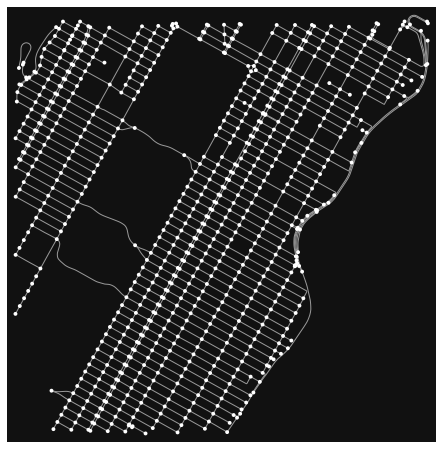

In [74]:
fig, ax = ox.plot_graph(G)

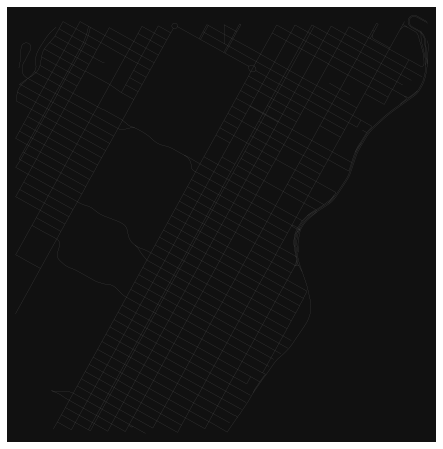

In [75]:
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.1)

In [76]:
# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G2.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='highway',
                                 weight=5,
                                 color=color)
        
m
